In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_error

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

In [47]:
train = pd.read_csv('../Housing Dreams/house_train_raw.csv')
test = pd.read_csv('../Housing Dreams/houses_test_raw.csv')

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
train.shape

(1460, 81)

In [50]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [51]:
test.drop(['Id'],axis=1,inplace=True)

#### Miro como estan distribuidos los valores en SalePrice

Text(0.5, 1.0, 'SalePrice')

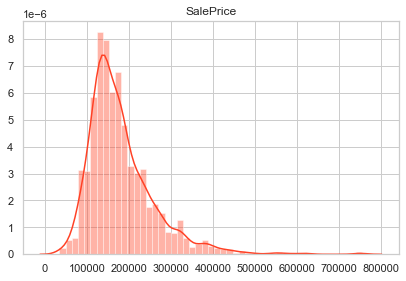

In [52]:
sns.distplot(a=train['SalePrice'],color='#ff4125',axlabel=False).set_title('SalePrice')

In [53]:
train['SalePrice']=np.log1p(train['SalePrice'])

Text(0.5, 1.0, 'log(1+SalePrice)')

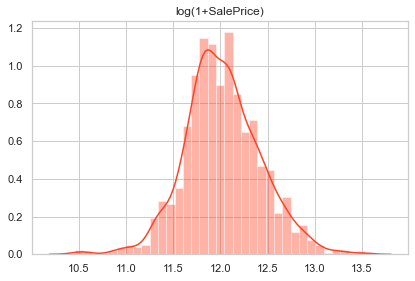

In [54]:
sns.distplot(a=train['SalePrice'],color='#ff4125',axlabel=False).set_title('log(1+SalePrice)')

### Miro la correlacion entre SalePrice y las demas features

In [55]:
cor= train[:].corr()
cor=cor.sort_values(['SalePrice'],ascending=False)

In [56]:
cor.SalePrice

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

### Hago un grafico de correlacion entre las q mas correlacion tienen con SalePrice

<AxesSubplot:>

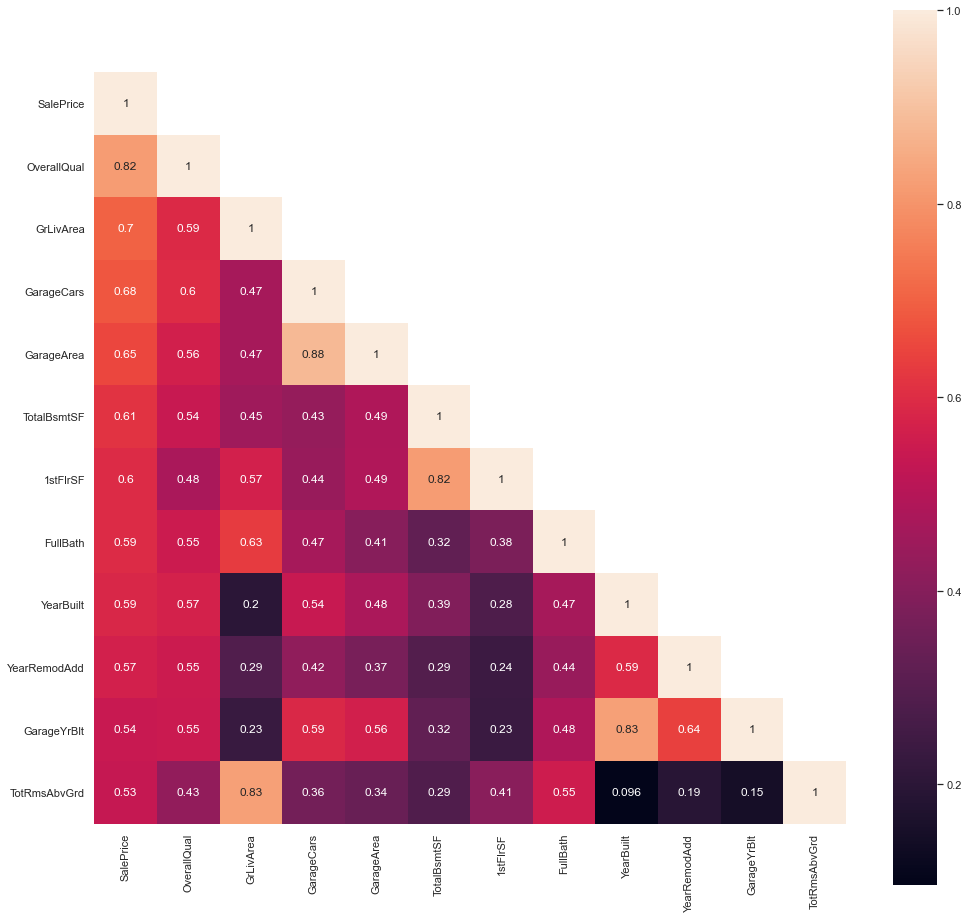

In [57]:
cor_mat= train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Elimino outliers de las features con mas correlacion 

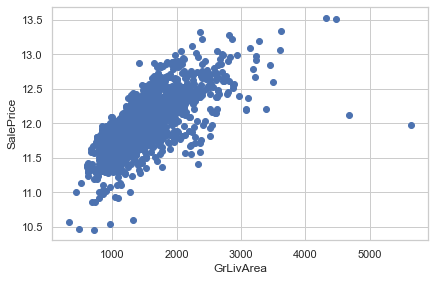

In [58]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [59]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<13)].index)

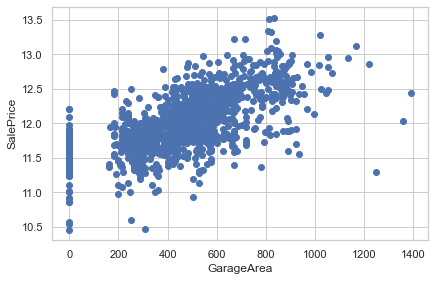

In [60]:
fig, ax = plt.subplots()
ax.scatter(x =(train['GarageArea']), y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

In [61]:
train = train.drop(train[(train['GarageArea']>1200)].index)

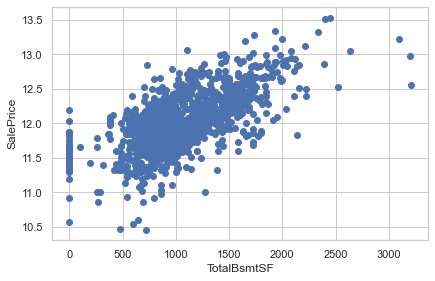

In [62]:
fig, ax = plt.subplots()
ax.scatter(x =(train['TotalBsmtSF']), y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()  

In [63]:
train = train.drop(train[(train['GarageArea']>3000)].index)

### Busco y elimino las Features con mas nulos

In [64]:
nan_data = (train.isnull().sum())
nan_data= nan_data.drop(nan_data[nan_data== 0].index).sort_values(ascending=False)
nan_data

PoolQC          1448
MiscFeature     1401
Alley           1363
Fence           1173
FireplaceQu      689
LotFrontage      258
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [65]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','Id','FireplaceQu'],axis=1,inplace=True)
test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

### LotFrontage es una feature importante, entonces veo el porcentaje de correlacion para luego analizar como solucionar los datos nulos

In [66]:
cr=train.corr()
print("La correlacion entre LotFrontage y SalePrice es: " , cr.loc['LotFrontage','SalePrice'])

La correlacion entre LotFrontage y SalePrice es:  0.37452342893459556


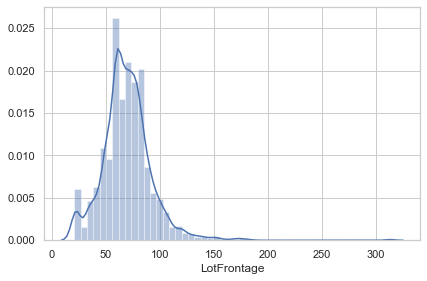

In [67]:
sns.distplot(train.LotFrontage)
plt.show()

In [68]:
train['LotFrontage'].mean()

69.6948160535117

In [69]:
print('El porcentaje de datos que faltan en LotFrontage es ',train.LotFrontage.isnull().sum()/len(train)*100)

El porcentaje de datos que faltan en LotFrontage es  17.744154057771663


In [70]:
train.loc[train['LotFrontage'].isnull()==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,12.206078
12,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,176,0,0,9,2008,WD,Normal,11.877576
14,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,176,0,0,0,0,5,2008,WD,Normal,11.964007
16,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,11.911708
24,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,11.944714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,99,0,0,0,0,4,2007,WD,Normal,12.116700
1431,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,11.875838
1441,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,11.913720
1443,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,40,0,0,5,2009,WD,Normal,11.703554


### Le reemplazo el valor promedio en los datos nulos de la Feature LotFrontage

In [71]:
train.loc[train['LotFrontage'].isnull()==True,'LotFrontage']=69.69
test.loc[test['LotFrontage'].isnull()==True,'LotFrontage']=69.69

### Tratamiento de nulos a las Features que voy a usar

Propiedades con garaje:

In [72]:
train['GarageYrBlt'].fillna(0,inplace=True)
train['GarageArea'].fillna(0,inplace=True)
train['GarageCars'].fillna(0,inplace=True)

train['GarageQual'].fillna('None',inplace=True)
train['GarageFinish'].fillna('None',inplace=True)
train['GarageCond'].fillna('None',inplace=True)
train['GarageType'].fillna('None',inplace=True)

In [73]:
test['GarageYrBlt'].fillna(0,inplace=True)
test['GarageArea'].fillna(0,inplace=True)
test['GarageCars'].fillna(0,inplace=True)

test['GarageQual'].fillna('None',inplace=True)
test['GarageFinish'].fillna('None',inplace=True)
test['GarageCond'].fillna('None',inplace=True)
test['GarageType'].fillna('None',inplace=True)

Propiedades con Sótano :

In [74]:
train['BsmtFinSF1'].fillna(0,inplace=True)
train['BsmtFinSF2'].fillna(0,inplace=True)
train['BsmtUnfSF'].fillna(0,inplace=True)
train['TotalBsmtSF'].fillna(0,inplace=True)
train['BsmtFullBath'].fillna(0,inplace=True)
train['BsmtHalfBath'].fillna(0,inplace=True)

train['BsmtQual'].fillna('None',inplace=True)
train['BsmtCond'].fillna('None',inplace=True)
train['BsmtExposure'].fillna('None',inplace=True)
train['BsmtFinType1'].fillna('None',inplace=True)
train['BsmtFinType2'].fillna('None',inplace=True)

In [75]:
test['BsmtFinSF1'].fillna(0,inplace=True)
test['BsmtFinSF2'].fillna(0,inplace=True)
test['BsmtUnfSF'].fillna(0,inplace=True)
test['TotalBsmtSF'].fillna(0,inplace=True)
test['BsmtFullBath'].fillna(0,inplace=True)
test['BsmtHalfBath'].fillna(0,inplace=True)

test['BsmtQual'].fillna('None',inplace=True)
test['BsmtCond'].fillna('None',inplace=True)
test['BsmtExposure'].fillna('None',inplace=True)
test['BsmtFinType1'].fillna('None',inplace=True)
test['BsmtFinType2'].fillna('None',inplace=True)

In [76]:
train['MasVnrArea'].fillna(0,inplace=True)
train['MasVnrType'].fillna('None',inplace=True)

In [77]:
test['MasVnrArea'].fillna(0,inplace=True)
test['MasVnrType'].fillna('None',inplace=True)

En Utilities veo que en train tegno dos datos unicos y en test tengo dos pero uno es nan, entonces la elimino

In [78]:
train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [79]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [80]:
train.drop(['Utilities'],axis=1,inplace=True)
test.drop(['Utilities'],axis=1,inplace=True)

In [81]:
for col in ['Functional','SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  train[col].fillna(train[col].mode()[0],inplace=True)
  test[col].fillna(test[col].mode()[0],inplace=True)

### Preparo los datos para el entrenamiento del modelo

In [82]:
for col in train.columns:
    if(train[col].dtype == 'object'):
      le=LabelEncoder()
      train[col]=le.fit_transform(train[col])

In [83]:
for col in test.columns:
    if(test[col].dtype == 'object'):
      le=LabelEncoder()
      test[col]=le.fit_transform(test[col])

In [84]:
for col in train.columns:
  if col != 'SalePrice':
    if(train[col].dtype != 'object'):
      train[col] = np.log1p(train[col])

In [85]:
for col in test.columns:
    if(test[col].dtype != 'object'):
      test[col] = np.log1p(test[col])

### Separo los datos de entrenamiento y test, y entreno el modelo calculando el error medio cuadrado

In [86]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=42)

In [87]:
reg_gb=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.05,max_depth=3,min_samples_split=10,max_features='sqrt',subsample=0.75 ,loss='huber')
reg_gb.fit(x_train,y_train)
predict=reg_gb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,predict)))

0.12434553177673169


In [88]:
predict=reg_gb.predict(test)

In [89]:
#Le saco el logaritmo que aplique al precio aplicando su opuesto a la prediccion.
pred = np.expm1(predict)
prediccion_precios = pd.DataFrame((pred),columns = ['Precios'])

#GUARDO MI PREDICCION EN UN CSV
prediccion_precios.to_csv('pred_test.csv', index = False)